In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import boxcox

In [47]:
day = pd.read_csv('day.csv')
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [48]:
day['day'] = pd.to_datetime(day['dteday']).dt.day

In [49]:
corr_matrix = day.corr(numeric_only=True).abs()
corr_matrix['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
weathersit    0.297391
mnth          0.279977
windspeed     0.234545
hum           0.100659
holiday       0.068348
weekday       0.067443
workingday    0.061156
day           0.024204
Name: cnt, dtype: float64

In [50]:
# day[:17379].plot(x='dteday', y='cnt',figsize=(10,5),cmap = 'Set3')
# plt.xticks(rotation=45)
# plt.grid()

In [51]:
# sns.barplot(x="mnth", y="cnt", data=hour, palette = 'Set3')
# plt.title('count vs month')

In [52]:
# plt.figure(figsize=(10,5))
# sns.barplot(x='hr',y='cnt',data=hour , palette = 'Set3')
# plt.title('hours vs count')

In [53]:
# figure, axes = plt.subplots(2,2)
# figure.set_size_inches(10, 10)
# # boxplot of all catagorical features 
# # season , weather , workingday , holiday
# plt.subplot(2,2,1)
# sns.boxplot(x='season',y='cnt',data=hour,palette = 'Set3')
# plt.subplot(2,2,2)
# sns.boxplot(x='weathersit',y='cnt',data=hour,palette = 'Set3')
# plt.subplot(2,2,3)
# sns.boxplot(x='workingday',y='cnt',data=hour,palette = 'Set3')
# plt.subplot(2,2,4)
# sns.boxplot(x='holiday',y='cnt',data=hour,palette = 'Set3')

In [54]:
# plt.figure(figsize = (15,10))
# tc =round(hour.corr(numeric_only=True),2)
# sns.heatmap(tc, annot = True, cmap = 'Set3', linecolor = 'white', linewidths=0.1)

In [55]:
# sns.set()
# sns.pairplot(hour, height = 2.5,kind="kde",corner=True)
# plt.show();

In [56]:
# fig, axs = plt.subplots(3,2)
# fig.set_size_inches(16,15)
# sns.barplot(data=hour, x="weekday", y="cnt", hue='workingday', ax=axs[0][0],palette = 'Set3')
# sns.barplot(data=hour, x="weekday", y="cnt", ax=axs[0][1],palette = 'Set3')
# sns.lineplot(data=hour, x="hr", y="cnt", hue='workingday', marker='o', markers=True, dashes=False, ax=axs[1][0],palette = 'Set3')
# sns.barplot(data=hour, x="dteday", y="cnt", ax=axs[1][1],palette = 'Set3')
# sns.lineplot(data=hour, x="mnth", y="cnt", marker='o', markers=True, dashes=False, ax=axs[2][0])
# sns.barplot(data=hour, x="yr", y="cnt", ax=axs[2][1],palette = 'Set3')

In [57]:
# fig, axs = plt.subplots(1,3)
# fig.set_size_inches(20,5)
# sns.lineplot(data=hour, x="hum", y="cnt", ax=axs[0])
# sns.lineplot(data=hour, x="windspeed", y="cnt", ax=axs[1])
# sns.lineplot(data=hour, x="temp", y="cnt", ax=axs[2])

In [58]:
# plt.figure(figsize = (8,4))
# sns.lineplot(x = 'mnth', y = 'cnt', data = hour, estimator = np.average, hue = 'weathersit', palette = 'Set3')
# plt.ylabel('Average Count')
# plt.show()

In [59]:
# fig, axes = plt.subplots(ncols = 2, figsize = (15,5), sharey = True)
# sns.pointplot(x = 'hr', y = 'cnt', data = hour, estimator = np.average, hue = 'workingday', ax = axes[0], palette = 'Set3')
# sns.pointplot(x = 'hr', y = 'cnt', data = hour, estimator = np.average, hue = 'holiday', ax = axes[1], palette = 'Set3')
# ax = [0,1]
# for i in ax:
#     axes[i].set(ylabel='Average Count')

در روزهای کاری حدود ساعت 7 و 17 تقاضای زیادی وجود دارد. تقاضای کمتری در ساعت 0 تا 5 و 10 تا 14 ساعت وجود دارد.
در روزهای غیر کاری در ساعات 10 تا 14 تقاضای زیادی وجود دارد. در حدود ساعت 7 تقاضای کمتری وجود دارد.

In [60]:
# plt.figure(figsize = (10,4))
# g = sns.pointplot(x = 'hr', y = 'cnt', data = hour, estimator=np.average, hue = 'day', palette='Set3')
# g.legend_.remove()

In [61]:
# plot = sns.histplot(hour['cnt'], kde=True )
# for bin_,i in zip(plot.patches,sns.color_palette("Set3",50)):
#     bin_.set_facecolor(i)

In [62]:
print("Untransformed Skew:", day["cnt"].skew())
print("Log transformed Skew:",np.log(day["cnt"].skew()))
print("Sqrt transformed Skew:",np.sqrt(day["cnt"].skew()))
print("Boxcox transformed Skew:",pd.Series(boxcox(day['cnt'], 0.4)).skew())

Untransformed Skew: -0.04735278011900183
Log transformed Skew: nan
Sqrt transformed Skew: nan
Boxcox transformed Skew: -0.717633687453774


/tmp/ipykernel_11997/1063938057.py:2: RuntimeWarning: invalid value encountered in log
  print("Log transformed Skew:",np.log(day["cnt"].skew()))
/tmp/ipykernel_11997/1063938057.py:3: RuntimeWarning: invalid value encountered in sqrt
  print("Sqrt transformed Skew:",np.sqrt(day["cnt"].skew()))


روش باکس کمترین چولگی رو برای این ستون خواهد داشت

In [63]:
day = pd.get_dummies(day, columns=['yr','season','mnth',"weekday","weathersit"],
                      drop_first=False)

In [64]:
day.drop(['dteday', 'casual', 'registered','instant'], axis=1, inplace=True)

In [65]:
day.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'day', 'yr_0', 'yr_1', 'season_1', 'season_2', 'season_3', 'season_4',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

from sklearn.linear_model import LinearRegression, Ridge, ElasticNetCV,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_error,make_scorer,r2_score,confusion_matrix,mean_absolute_error
from sklearn import preprocessing
from sklearn import metrics
import math

In [72]:
X = day.drop('cnt',axis=1)
y = day["cnt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [73]:
# y_train = boxcox(y_train, 0.4)
# y_test = boxcox(y_test, 0.4)
# X_train = boxcox(X_train, 0.4)
# X_test = boxcox(X_test, 0.4)

In [74]:
y_train = np.log(y_train)
y_test = np.log(y_test)

تو قسمت های بالا وقتی روش باکس رو زدم چولگی کمتر شد
ولی اینجا همون روش باکس رو مدل میزدم عدد های مدل بد میشد
حالا یا من اشتباه میزدم
یا واقعا خوب جواب نمیداد
برای همین لگاریتم زدم

In [75]:
models = [LinearRegression(),Ridge(),DecisionTreeRegressor(), RandomForestRegressor(),ExtraTreesRegressor(),
         SGDRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]

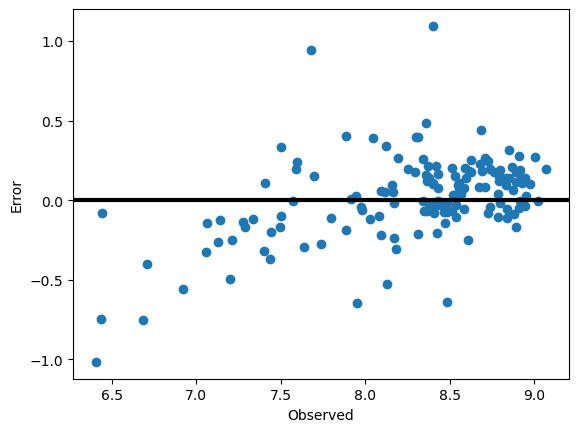

MSE :  0.07189554538429521
R2_SCORE :  0.803939452050002
MAPE :  0.1914665937051587


In [108]:
m1 = 'LinearRegression'
lr = make_pipeline(StandardScaler(), LinearRegression())
lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

error = y_test - lr_predicted
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

print("MSE : ",mean_squared_error(y_test, lr_predicted))
print("R2_SCORE : ",r2_score( y_test,lr_predicted))
print("MAPE : ",mean_absolute_error(y_test, lr_predicted ,multioutput='uniform_average'))

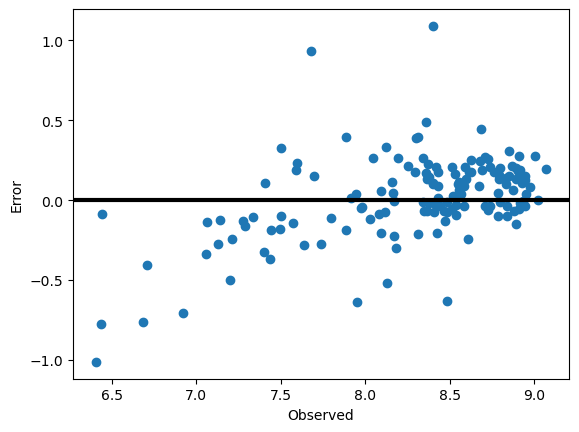

MSE :  0.07279326369218544
R2_SCORE :  0.8014913567972445
MAPE :  0.19217651015073833


In [109]:
m2 = 'Ridge'
rg = make_pipeline(StandardScaler(), Ridge())
rg.fit(X_train, y_train)
rg_predicted = rg.predict(X_test)

error = y_test - rg_predicted
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()


print("MSE : ",mean_squared_error(y_test, rg_predicted))
print("R2_SCORE : ",r2_score( y_test,rg_predicted))
print("MAPE : ",mean_absolute_error(y_test, rg_predicted ,multioutput='uniform_average'))

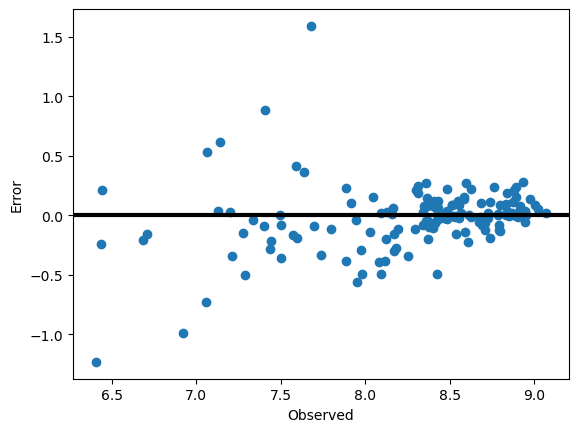

MSE :  0.07931204722483212
R2_SCORE :  0.7837145075564942
MAPE :  0.17064658169552654


In [110]:
m3 = 'DecisionTreeRegressor'
dt = make_pipeline(StandardScaler(), DecisionTreeRegressor())

dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)


error = y_test - dt_predicted
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

print("MSE : ",mean_squared_error(y_test, dt_predicted))
print("R2_SCORE : ",r2_score( y_test,dt_predicted))
print("MAPE : ",mean_absolute_error(y_test, dt_predicted ,multioutput='uniform_average'))

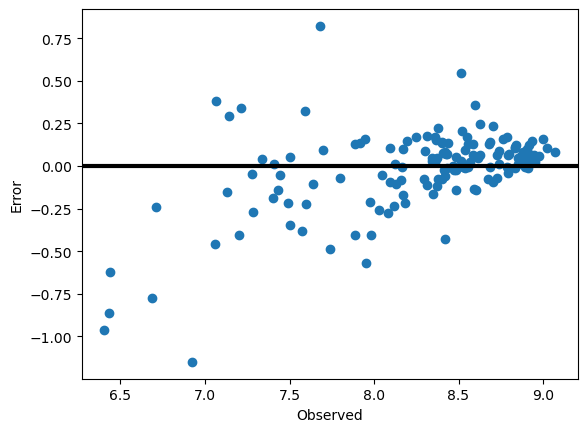

MSE :  0.061103774512554096
R2_SCORE :  0.8333688207147061
MAPE :  0.15846831527229632


In [102]:
m4 = 'RandomForestRegressor'
rf = make_pipeline(StandardScaler(), RandomForestRegressor())

rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)


error = y_test - rf_predicted
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()


print("MSE : ",mean_squared_error(y_test, rf_predicted))
print("R2_SCORE : ",r2_score( y_test,rf_predicted))
print("MAPE : ",mean_absolute_error(y_test, rf_predicted ,multioutput='uniform_average'))

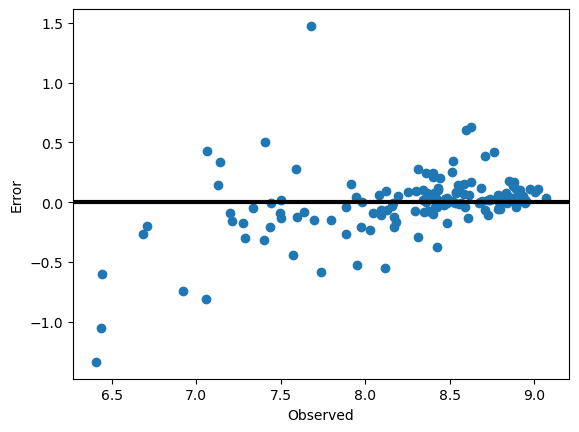

MSE :  0.0781667143808005
R2_SCORE :  0.7868378524561773
MAPE :  0.1614858861519006


In [103]:
m5 = 'ExtraTreesRegressor'
et = make_pipeline(StandardScaler(), ExtraTreesRegressor())

et.fit(X_train, y_train)
et_predicted = et.predict(X_test)


error = y_test - et_predicted
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()


print("MSE : ",mean_squared_error(y_test, et_predicted))
print("R2_SCORE : ",r2_score( y_test,et_predicted))
print("MAPE : ",mean_absolute_error(y_test, et_predicted ,multioutput='uniform_average'))

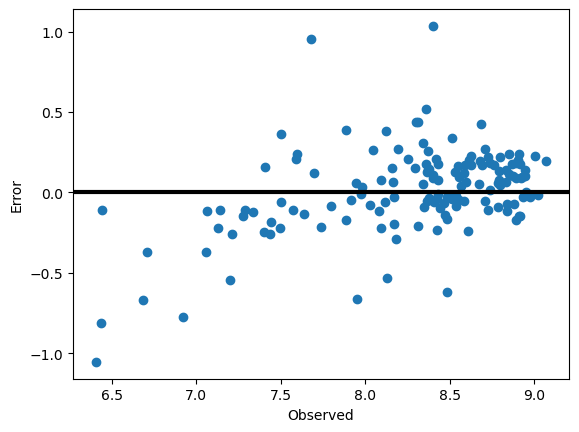

MSE :  0.07265926693664829
R2_SCORE :  0.8018567685508338
MAPE :  0.1911351925033814


In [104]:
m6 = 'SGDRegressor'
sgd = make_pipeline(StandardScaler(), SGDRegressor())

sgd.fit(X_train, y_train)
sgd_predicted = sgd.predict(X_test)


error = y_test - sgd_predicted
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()


print("MSE : ",mean_squared_error(y_test, sgd_predicted))
print("R2_SCORE : ",r2_score( y_test,sgd_predicted))
print("MAPE : ",mean_absolute_error(y_test, sgd_predicted ,multioutput='uniform_average'))

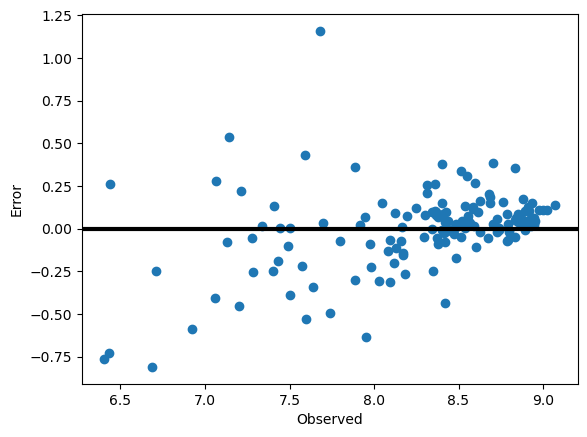

MSE :  0.05757820627495445
R2_SCORE :  0.842983113739457
MAPE :  0.157775847682466


In [105]:
m7 = 'GradientBoostingRegressor'
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())

gbr.fit(X_train, y_train)
gbr_predicted = gbr.predict(X_test)


error = y_test - gbr_predicted
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()


print("MSE : ",mean_squared_error(y_test, gbr_predicted))
print("R2_SCORE : ",r2_score( y_test,gbr_predicted))
print("MAPE : ",mean_absolute_error(y_test, gbr_predicted ,multioutput='uniform_average'))

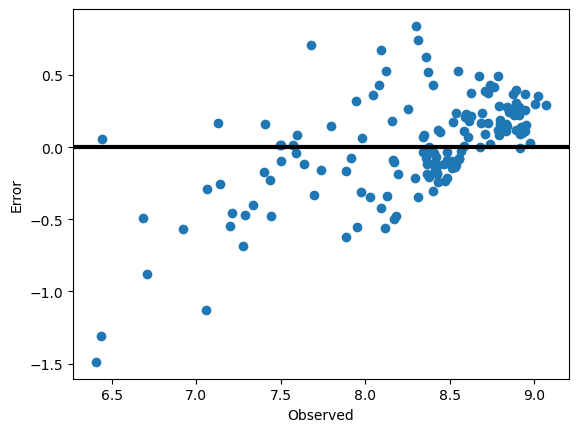

MSE :  0.1291687908884282
R2_SCORE :  0.6477541997316028
MAPE :  0.26855306894896963


In [106]:
m7 = 'KNeighborsRegressor'
knn = make_pipeline(StandardScaler(), KNeighborsRegressor())

knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)


error = y_test - knn_predicted
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()


print("MSE : ",mean_squared_error(y_test, knn_predicted))
print("R2_SCORE : ",r2_score( y_test,knn_predicted))
print("MAPE : ",mean_absolute_error(y_test, knn_predicted ,multioutput='uniform_average'))

In [112]:
print(m1)
print("MSE : ",mean_squared_error(y_test, lr_predicted))
print("R2_SCORE : ",r2_score( y_test,lr_predicted))
print("MAPE : ",mean_absolute_error(y_test, lr_predicted ,multioutput='uniform_average'))
print("***************")
print(m2)
print("MSE : ",mean_squared_error(y_test, rg_predicted))
print("R2_SCORE : ",r2_score( y_test,rg_predicted))
print("MAPE : ",mean_absolute_error(y_test, rg_predicted ,multioutput='uniform_average'))
print("***************")
print(m3)
print("MSE : ",mean_squared_error(y_test, dt_predicted))
print("R2_SCORE : ",r2_score( y_test,dt_predicted))
print("MAPE : ",mean_absolute_error(y_test, dt_predicted ,multioutput='uniform_average'))
print("***************")
print(m4)
print("MSE : ",mean_squared_error(y_test, rf_predicted))
print("R2_SCORE : ",r2_score( y_test,rf_predicted))
print("MAPE : ",mean_absolute_error(y_test, rf_predicted ,multioutput='uniform_average'))
print("***************")
print(m5)
print("MSE : ",mean_squared_error(y_test, et_predicted))
print("R2_SCORE : ",r2_score( y_test,et_predicted))
print("MAPE : ",mean_absolute_error(y_test, et_predicted ,multioutput='uniform_average'))
print("***************")
print(m6)
print("MSE : ",mean_squared_error(y_test, sgd_predicted))
print("R2_SCORE : ",r2_score( y_test,sgd_predicted))
print("MAPE : ",mean_absolute_error(y_test, sgd_predicted ,multioutput='uniform_average'))
print("***************")
print(m7)
print("MSE : ",mean_squared_error(y_test, knn_predicted))
print("R2_SCORE : ",r2_score( y_test,knn_predicted))
print("MAPE : ",mean_absolute_error(y_test, knn_predicted ,multioutput='uniform_average'))

LinearRegression
MSE :  0.07189554538429521
R2_SCORE :  0.803939452050002
MAPE :  0.1914665937051587
***************
Ridge
MSE :  0.07279326369218544
R2_SCORE :  0.8014913567972445
MAPE :  0.19217651015073833
***************
DecisionTreeRegressor
MSE :  0.07931204722483212
R2_SCORE :  0.7837145075564942
MAPE :  0.17064658169552654
***************
RandomForestRegressor
MSE :  0.061103774512554096
R2_SCORE :  0.8333688207147061
MAPE :  0.15846831527229632
***************
ExtraTreesRegressor
MSE :  0.0781667143808005
R2_SCORE :  0.7868378524561773
MAPE :  0.1614858861519006
***************
SGDRegressor
MSE :  0.07265926693664829
R2_SCORE :  0.8018567685508338
MAPE :  0.1911351925033814
***************
KNeighborsRegressor
MSE :  0.1291687908884282
R2_SCORE :  0.6477541997316028
MAPE :  0.26855306894896963


In [ ]:
با داده های روزانه مدل 
LinearRegression
بهتر جواب میده 
دارای خطای کمتر و عملکرد بهتری است